# EDA for the Heathow_Meteo_2010 to 19

### Basic EDA ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\\Users\\Hemant\\Desktop\\Heathrow data analysis\\data\\HeathrowMeteo2010-2019.csv")
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-01,0.0,",,S",0.8,"H,,S"
1,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-02,0.0,",,S",1.8,"H,,S"
2,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-03,0.0,",,S",0.4,"H,,S"
3,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-04,0.0,",,S",-2.8,"H,,S"
4,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-05,0.3,",,S",-1.3,"H,,S"


In [3]:
print("Shape: ",df.shape)
print("Columns:= ", df.columns)
print("Length:= ", len(df))

Shape:  (3621, 10)
Columns:=  Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES'],
      dtype='object')
Length:=  3621


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          3621 non-null   object 
 1   NAME             3621 non-null   object 
 2   LATITUDE         3621 non-null   float64
 3   LONGITUDE        3621 non-null   float64
 4   ELEVATION        3621 non-null   float64
 5   DATE             3621 non-null   object 
 6   PRCP             3591 non-null   float64
 7   PRCP_ATTRIBUTES  3591 non-null   object 
 8   TAVG             3621 non-null   float64
 9   TAVG_ATTRIBUTES  3621 non-null   object 
dtypes: float64(5), object(5)
memory usage: 283.0+ KB


<h4>columns </h4>
1. Station ,
2. Name ,
3. Latitude ,
4. Longitude ,
5. Elevation ,
6. Date ,
7. Precepitation ,
8. Precipitation Attribute ,
9. Temperature average ,
10. Temperature average attribute

In [5]:
df.isnull().sum()

STATION             0
NAME                0
LATITUDE            0
LONGITUDE           0
ELEVATION           0
DATE                0
PRCP               30
PRCP_ATTRIBUTES    30
TAVG                0
TAVG_ATTRIBUTES     0
dtype: int64

In [6]:
print("Unique values in PRCP_ATTRIBUTES: ",df["PRCP_ATTRIBUTES"].value_counts())
print("Unique values in TAVG_ATTRIBUTES: ",df["TAVG_ATTRIBUTES"].value_counts())

Unique values in PRCP_ATTRIBUTES:  PRCP_ATTRIBUTES
,,S     3270
B,,S     321
Name: count, dtype: int64
Unique values in TAVG_ATTRIBUTES:  TAVG_ATTRIBUTES
H,,S    3621
Name: count, dtype: int64


In [7]:
print(df['STATION'].value_counts())
print(df['NAME'].value_counts())


STATION
UKM00003772    3621
Name: count, dtype: int64
NAME
HEATHROW, UK    3621
Name: count, dtype: int64


In [8]:
# Drop Unnecessary or Constant value columns
df = df.drop(columns = ["TAVG_ATTRIBUTES" , "PRCP_ATTRIBUTES","STATION","NAME"] , errors='ignore')

In [9]:
round(df.isnull().mean() * 100, 2) # Null values present in a new dataframe in percentage.

LATITUDE     0.00
LONGITUDE    0.00
ELEVATION    0.00
DATE         0.00
PRCP         0.83
TAVG         0.00
dtype: float64

In [10]:
df["PRCP"] = df['PRCP'].fillna(df['PRCP'].median())

In [11]:
df.head(10)

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG
0,51.478,-0.461,25.3,2010-01-01,0.0,0.8
1,51.478,-0.461,25.3,2010-01-02,0.0,1.8
2,51.478,-0.461,25.3,2010-01-03,0.0,0.4
3,51.478,-0.461,25.3,2010-01-04,0.0,-2.8
4,51.478,-0.461,25.3,2010-01-05,0.3,-1.3
5,51.478,-0.461,25.3,2010-01-06,1.5,-0.1
6,51.478,-0.461,25.3,2010-01-07,3.0,-2.3
7,51.478,-0.461,25.3,2010-01-08,1.0,-1.4
8,51.478,-0.461,25.3,2010-01-09,0.3,-1.2
9,51.478,-0.461,25.3,2010-01-10,0.0,1.4


In [12]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   LATITUDE   3621 non-null   float64       
 1   LONGITUDE  3621 non-null   float64       
 2   ELEVATION  3621 non-null   float64       
 3   DATE       3621 non-null   datetime64[ns]
 4   PRCP       3621 non-null   float64       
 5   TAVG       3621 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 169.9 KB


In [14]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG
count,3.621000e+03,3.621000e+03,3.621000e+03,3621,3621.000000,3621.000000
mean,5.147800e+01,-4.610000e-01,2.530000e+01,2014-12-26 18:14:24.954432512,1.630875,11.642474
min,5.147800e+01,-4.610000e-01,2.530000e+01,2010-01-01 00:00:00,0.000000,-4.100000
25%,5.147800e+01,-4.610000e-01,2.530000e+01,2012-06-24 00:00:00,0.000000,7.400000
50%,5.147800e+01,-4.610000e-01,2.530000e+01,2014-12-16 00:00:00,0.000000,11.600000
75%,5.147800e+01,-4.610000e-01,2.530000e+01,2017-06-29 00:00:00,1.500000,16.000000
max,5.147800e+01,-4.610000e-01,2.530000e+01,2019-12-31 00:00:00,48.000000,28.600000
std,2.131923e-14,1.110376e-16,3.553204e-15,NaN,3.647083,5.594055


In [15]:
# Climate temperature deviation. 

TAVG_Anomaly = df['TAVG'] - df['TAVG'].mean()
TAVG_Anomaly

0      -10.842474
1       -9.842474
2      -11.242474
3      -14.442474
4      -12.942474
          ...    
3616    -4.342474
3617    -3.642474
3618    -4.342474
3619    -5.142474
3620    -4.342474
Name: TAVG, Length: 3621, dtype: float64

In [16]:
print(f"Data Available from {df.DATE.min()} to {df.DATE.max()}")

Data Available from 2010-01-01 00:00:00 to 2019-12-31 00:00:00


In [17]:
index = pd.date_range(df.DATE.min() , df.DATE.max())
print(f"Days present {len(df)} out of {len(index)}")

Days present 3621 out of 3652


### Distribution of the precipitation and temperature. ###

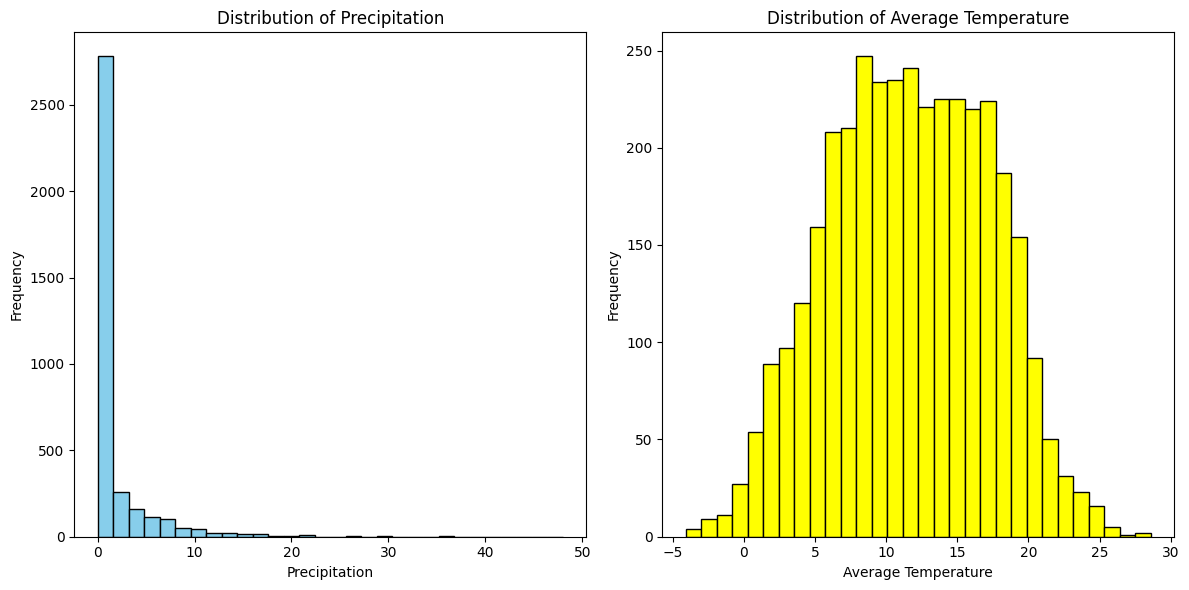

In [18]:
fig , ax = plt.subplots(1 , 2 , figsize = (12 ,6))

ax[0].hist(df["PRCP"], bins=30 , color='skyblue', edgecolor = 'black')
ax[0].set_xlabel("Precipitation")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Precipitation")

ax[1].hist(df["TAVG"], bins=30 , color='yellow' , edgecolor = 'black')
ax[1].set_xlabel("Average Temperature")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Average Temperature")

plt.tight_layout()
plt.show()

<h4>Introducing new features from existing feature

In [19]:
pd.DataFrame(data=index.difference(df.DATE), columns=['DATE']).sample(3)


,DATE
29,2019-05-18
14,2015-04-22
8,2015-04-16


In [20]:
df["Year"] = df["DATE"].dt.year
df["Month"] = df["DATE"].dt.month
df["Day"] = df["DATE"].dt.day
df['Weekdays'] = df.DATE.dt.weekday
df['Week'] = df.DATE.dt.day_of_week
df['Weekends'] = df.DATE.dt.weekday // 5 == 1

df.head(3)

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,Year,Month,Day,Weekdays,Week,Weekends
0,51.478,-0.461,25.3,2010-01-01,0.0,0.8,2010,1,1,4,4,False
1,51.478,-0.461,25.3,2010-01-02,0.0,1.8,2010,1,2,5,5,True
2,51.478,-0.461,25.3,2010-01-03,0.0,0.4,2010,1,3,6,6,True


In [21]:
df['Raining'] = (df['PRCP'] <= 1.0).astype(int)

In [22]:
df.sample(3)

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,Year,Month,Day,Weekdays,Week,Weekends,Raining
2980,51.478,-0.461,25.3,2018-03-21,0.0,5.3,2018,3,21,2,2,False,1
643,51.478,-0.461,25.3,2011-10-06,0.0,13.2,2011,10,6,3,3,False,1
2912,51.478,-0.461,25.3,2018-01-12,0.3,6.7,2018,1,12,4,4,False,1


In [23]:
df['Raining'].value_counts()

Raining
1    2626
0     995
Name: count, dtype: int64

In [24]:
# Pivot table representation for month and year.
month_in_year = pd.pivot_table(data = df , values= 'PRCP', index = ['Month'] , columns = ['Year'] , fill_value=0 , margins=True)
name_idx = [[calendar.month_abbr[i] if isinstance(i , int) else i for i in list(month_in_year.index)]] # replace numeric month index with abbreviated month names.
month_year_Df = month_in_year.set_index(name_idx) 
month_year_Df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
Jan,1.687097,2.506452,0.996774,1.309677,4.783871,1.964516,2.383871,1.867742,1.329032,0.929032,1.975806
Feb,3.196429,1.535714,0.579310,1.389286,3.671429,1.457143,1.572414,1.450000,0.989286,1.346429,1.714184
Mar,1.641935,0.464516,0.561290,1.554839,1.041935,0.835484,2.367742,0.887097,2.680645,1.654839,1.369032
Apr,0.726667,0.086667,2.926667,1.130000,1.880000,0.922222,1.593333,0.123333,2.156667,0.426667,1.217921
May,0.764516,0.806452,0.835484,1.332258,2.841935,0.819355,1.567742,2.151613,1.964516,1.337037,1.443464
Jun,0.250000,2.643333,3.390000,0.400000,1.356667,0.423333,3.513333,1.546667,0.016667,2.736667,1.627667
Jul,0.548387,1.561290,1.835484,0.819355,1.622581,2.325806,0.541935,2.932258,0.483871,1.632258,1.430323
Aug,3.019355,2.154839,1.141935,1.067742,3.174194,3.412903,0.700000,1.858065,1.538710,1.100000,1.916774
Sep,1.033333,1.160000,1.230000,1.676667,0.360000,2.056667,1.316667,1.946667,0.563333,1.856667,1.320000
Oct,2.000000,0.409677,2.454839,1.596774,2.480645,1.296774,0.800000,0.448387,1.845161,3.125806,1.645806


In [25]:
# Distribution of the precipipation accross months per year.
def plot_heatmap(df, title):
    plt.Figure(figsize=(12,6))
    ax = sns.heatmap(df , cmap = 'coolwarm' , robust=True , fmt=".2f" , annot=True ,  cbar_kws={'shrink':.8, 'label':'Precipitation (mm)'})

    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0 , fontsize = 10)
    ax.set_xticklabels(ax.get_xticklabels() , rotation = 45 , fontsize = 10)
    plt.title(title , fontdict={'fontsize':20}, pad = 14)


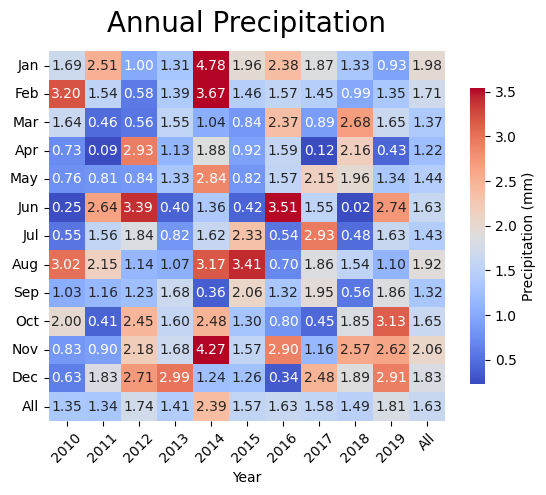

In [26]:
plot_heatmap(month_year_Df , "Annual Precipitation")

In [27]:
# Pivot table: total precipitation (PRCP) by month and year
month_in_year_sum = pd.pivot_table(data = df , values= 'PRCP', index = ['Month'] , columns = ['Year'] , fill_value=0 , margins=True , aggfunc=np.sum)
name_idx = [[calendar.month_abbr[i] if isinstance(i , int) else i for i in list(month_in_year_sum.index)]] # Replace numeric month index with abbreviated month names
month_year_sum_Df = month_in_year_sum.set_index(name_idx)
month_year_sum_Df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
Jan,52.3,77.7,30.9,40.6,148.3,60.9,73.9,57.9,41.2,28.8,612.5
Feb,89.5,43.0,16.8,38.9,102.8,40.8,45.6,40.6,27.7,37.7,483.4
Mar,50.9,14.4,17.4,48.2,32.3,25.9,73.4,27.5,83.1,51.3,424.4
Apr,21.8,2.6,87.8,33.9,56.4,8.3,47.8,3.7,64.7,12.8,339.8
May,23.7,25.0,25.9,41.3,88.1,25.4,48.6,66.7,60.9,36.1,441.7
Jun,7.5,79.3,101.7,12.0,40.7,12.7,105.4,46.4,0.5,82.1,488.3
Jul,17.0,48.4,56.9,25.4,50.3,72.1,16.8,90.9,15.0,50.6,443.4
Aug,93.6,66.8,35.4,33.1,98.4,105.8,21.7,57.6,47.7,34.1,594.2
Sep,31.0,34.8,36.9,50.3,10.8,61.7,39.5,58.4,16.9,55.7,396.0
Oct,62.0,12.7,76.1,49.5,76.9,40.2,24.8,13.9,57.2,96.9,510.2


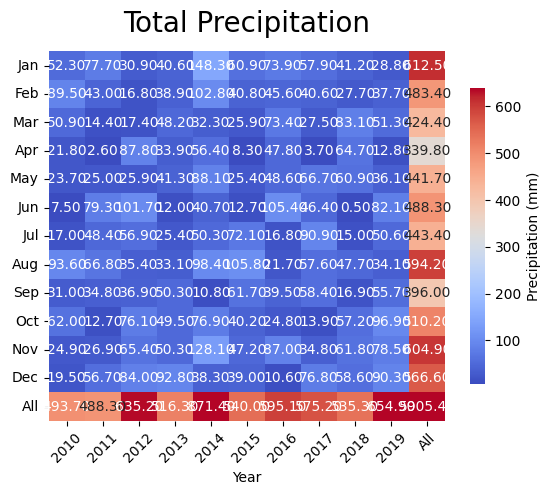

In [28]:
plot_heatmap(month_year_sum_Df , "Total Precipitation")

In [29]:
# Calculate the fraction of days in each month/year where precipitation (PRCP) exceeded 1 unit (millimeters).
pd.pivot_table(df,values="PRCP",index=["Month"],
               columns=["Year"],
               aggfunc=lambda x:  (x>1).sum()/len(x),
               fill_value=0,margins=True)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
Month,,,,,,,,,,,
1,0.419355,0.225806,0.129032,0.290323,0.774194,0.258065,0.483871,0.290323,0.225806,0.193548,0.329032
2,0.357143,0.250000,0.137931,0.214286,0.607143,0.321429,0.310345,0.428571,0.285714,0.321429,0.322695
3,0.354839,0.096774,0.096774,0.258065,0.225806,0.290323,0.322581,0.225806,0.516129,0.419355,0.280645
4,0.200000,0.033333,0.533333,0.233333,0.266667,0.444444,0.333333,0.033333,0.266667,0.133333,0.232975
5,0.161290,0.161290,0.225806,0.225806,0.451613,0.258065,0.161290,0.225806,0.258065,0.259259,0.238562
6,0.066667,0.400000,0.400000,0.133333,0.266667,0.100000,0.566667,0.133333,0.000000,0.300000,0.236667
7,0.096774,0.225806,0.387097,0.161290,0.258065,0.225806,0.161290,0.258065,0.096774,0.258065,0.212903
8,0.387097,0.354839,0.290323,0.129032,0.290323,0.387097,0.129032,0.225806,0.290323,0.290323,0.277419
9,0.200000,0.166667,0.133333,0.266667,0.100000,0.200000,0.266667,0.366667,0.100000,0.300000,0.210000


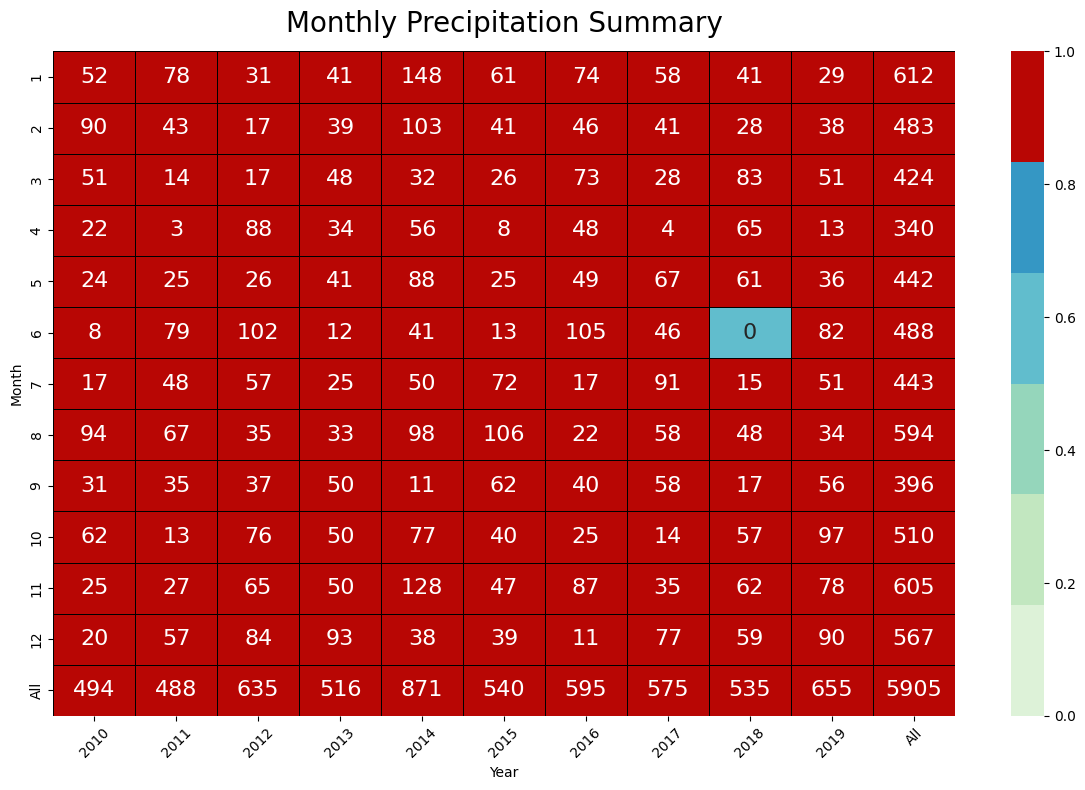

In [30]:
# plot the heatmap showing montly precipitation 
plt.figure(figsize=(12, 8))  # Increase size for better readability

custom_pallet = sns.color_palette("GnBu",6)
custom_pallet[5] = sns.color_palette("OrRd",6)[5]

sns.heatmap(
    data=month_in_year_sum,
    cmap= custom_pallet,
    annot=True,
    fmt=".0f",
    vmin=0,
    vmax=1,
    linecolor="black",
    linewidths=0.5,
    annot_kws={"size": 16}
)

plt.xticks(rotation=45)
plt.title("Monthly Precipitation Summary", fontsize=20, pad=14)
plt.tight_layout()
plt.show()


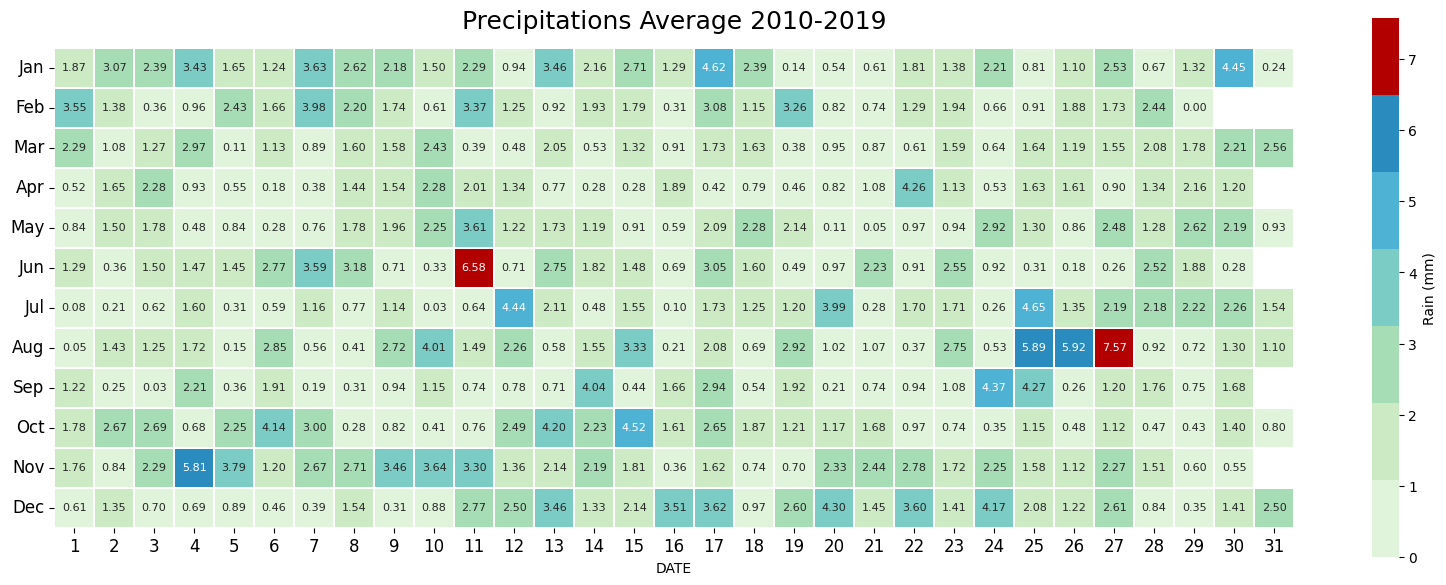

In [31]:
all_days_avg_df = df.groupby([df.DATE.dt.month, df.DATE.dt.day])['PRCP'].mean()
all_days_avg_df = all_days_avg_df.unstack()
all_days_avg_df = all_days_avg_df.set_index([[calendar.month_abbr[i] for i in list(all_days_avg_df.index)]])

custom_pallet = sns.color_palette("GnBu",7)
custom_pallet[6] = sns.color_palette("OrRd",7)[6]

plt.figure(figsize = (20, 14))
ax = sns.heatmap(all_days_avg_df, cmap = custom_pallet, annot=True, fmt='.2f',
                 vmin=0, linewidths=.1,
                 annot_kws={"size": 8}, square=True,
                 cbar_kws={"shrink": .5, 'label': 'Rain (mm)'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
ax.tick_params(rotation = 0)
_ = plt.title('Precipitations Average 2010-2019', fontdict={'fontsize':18}, pad=14)

### Temperature Trend and Rainfall Trend ###

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


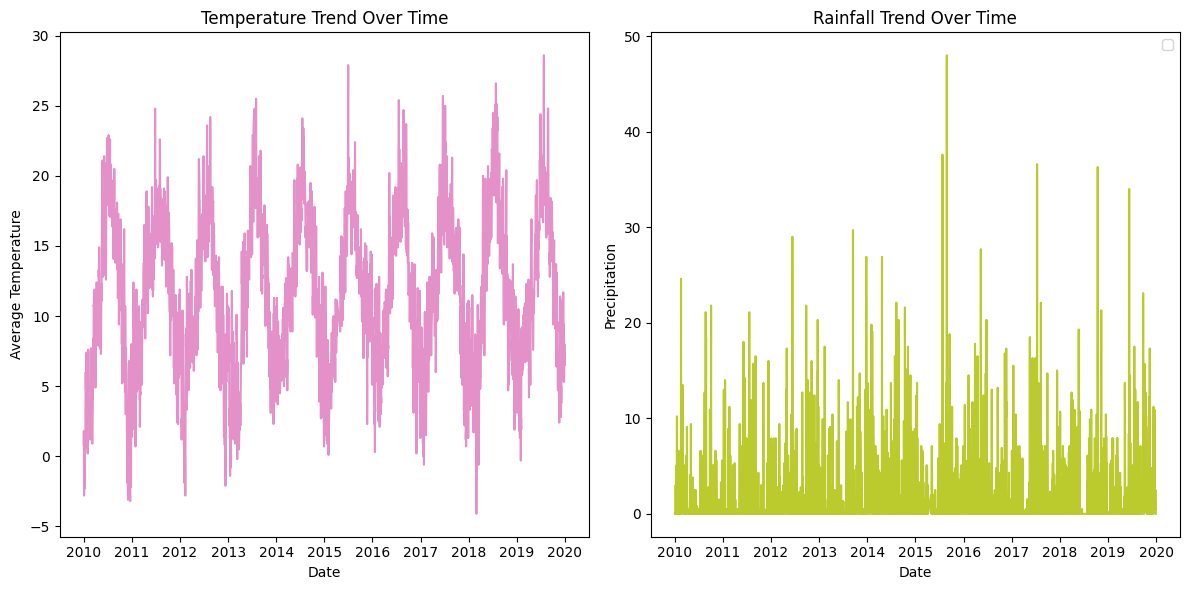

In [32]:
fig , ax = plt.subplots(1 ,2 , figsize=(12,6))

ax[0].plot(df["DATE"], df["TAVG"] , color = '#E491C9') # Relationship between Date and average temperature.
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average Temperature")
ax[0].set_title("Temperature Trend Over Time")

ax[1].plot(df["DATE"], df["PRCP"], color = '#BBCB2E') # Relationship between dates and precipitation. 
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Precipitation")
ax[1].set_title("Rainfall Trend Over Time")

plt.legend()
plt.tight_layout()
plt.show()

### Monthly precipitation  ###

In [33]:
def plot_heatmap_year(year):
    plt.figure(figsize = (10, 6))
    allByYear_df = df.loc[df['Year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="PRCP",
                                  index=["Month"], columns=["Day"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[calendar.month_abbr[i] for i in list(allByYear_df.index)]])
    ax = sns.heatmap(allByYear_df, cmap = 'RdYlGn_r',
                     vmin=0, vmax=20,
                     annot=False, linewidths=.1,
                     annot_kws={"size": 8}, square=True, cbar_kws={"shrink": .48, 'label': 'Rain (mm)'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    ax.tick_params(rotation = 0)
    plt.title(f'Precipitations {year}', fontdict={'fontsize':18}, pad=14);

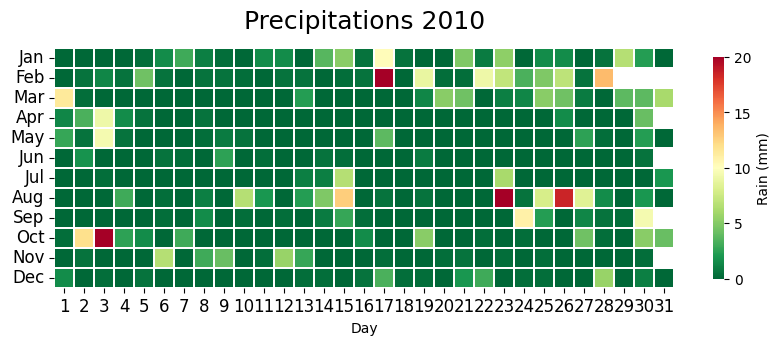

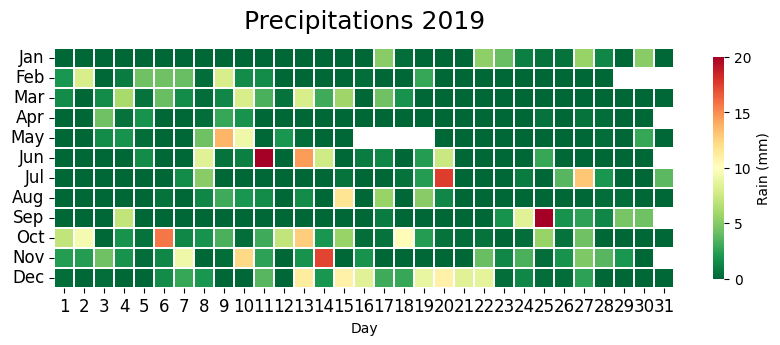

In [34]:
plot_heatmap_year(2010)
# plot_heatmap_year(2014)
plot_heatmap_year(2019)

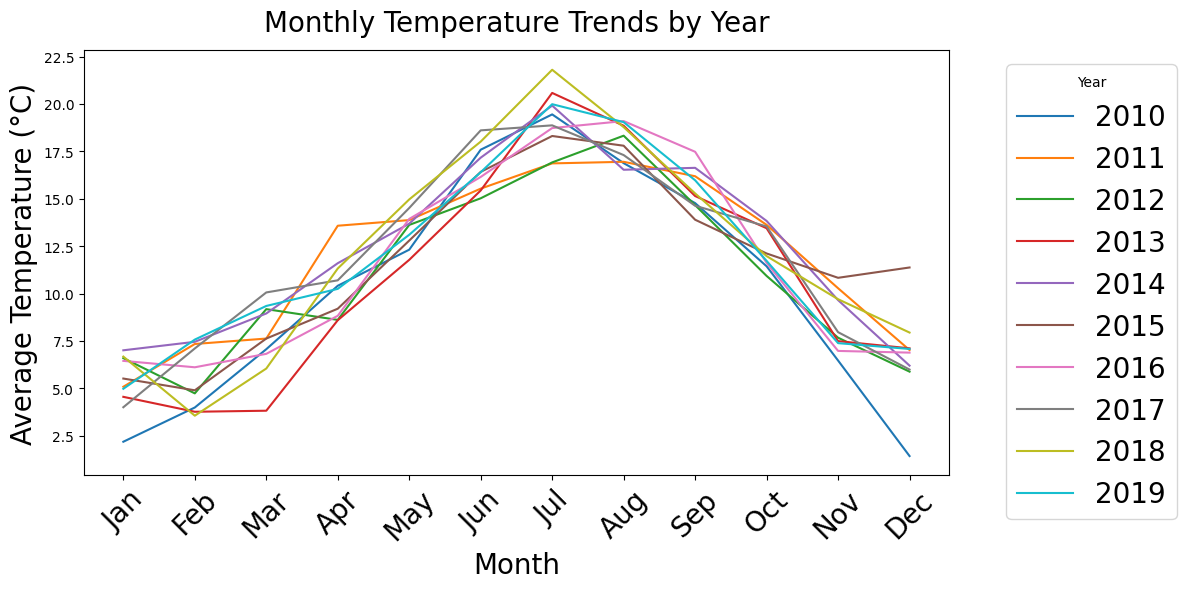

In [35]:
# Monthly Aggregation of the temperature according to year

monthly = df.groupby(["Year", "Month"])[["TAVG"]].mean().reset_index()
monthly["Month"] = monthly["Month"].apply(lambda x: calendar.month_abbr[x]) 

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x="Month", y="TAVG", hue="Year", palette="tab10")

plt.xlabel("Month" ,  fontsize = 20)
plt.ylabel("Average Temperature (°C)",  fontsize = 20)
plt.title("Monthly Temperature Trends by Year", fontsize=20, pad=14)
plt.xticks(rotation=45 , fontsize = 20)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)
plt.tight_layout()
plt.show()


In [36]:
# No of days in dry and rainy wheather.
df['val_grp'] = (df['Raining'].diff() != 0).astype("int").cumsum()
df.head(5)


,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,Year,Month,Day,Weekdays,Week,Weekends,Raining,val_grp
0,51.478,-0.461,25.3,2010-01-01,0.0,0.8,2010,1,1,4,4,False,1,1
1,51.478,-0.461,25.3,2010-01-02,0.0,1.8,2010,1,2,5,5,True,1,1
2,51.478,-0.461,25.3,2010-01-03,0.0,0.4,2010,1,3,6,6,True,1,1
3,51.478,-0.461,25.3,2010-01-04,0.0,-2.8,2010,1,4,0,0,False,1,1
4,51.478,-0.461,25.3,2010-01-05,0.3,-1.3,2010,1,5,1,1,False,1,1


### The Consecutive realationship of raining according to the date. ###

In [37]:
group_val = df.groupby("val_grp")
consec_df = pd.DataFrame({
    "Begin_Date":group_val.DATE.first(),
    "End_Date":group_val.DATE.last(),
    "Consecutive":group_val.size(), 
    "Condition":group_val.Raining.max()
}).reset_index(drop = True)

consec_df['Condition'].replace({0:"NO Rain", 1:"Rain"}, inplace= True)
consec_df.sort_values(by = "Consecutive" , ascending=False).head(10)

,Begin_Date,End_Date,Consecutive,Condition
974,2018-05-31,2018-07-27,58,Rain
52,2010-06-10,2010-07-14,35,Rain
836,2017-03-24,2017-04-26,34,Rain
132,2011-04-06,2011-05-06,31,Rain
196,2011-11-06,2011-11-30,25,Rain
114,2011-01-19,2011-02-10,23,Rain
1026,2018-12-25,2019-01-16,23,Rain
432,2013-11-22,2013-12-13,22,Rain
1060,2019-04-11,2019-05-02,22,Rain
388,2013-07-04,2013-07-24,21,Rain


### Distribution of the raining count according to the consecutive sum of the range. ###

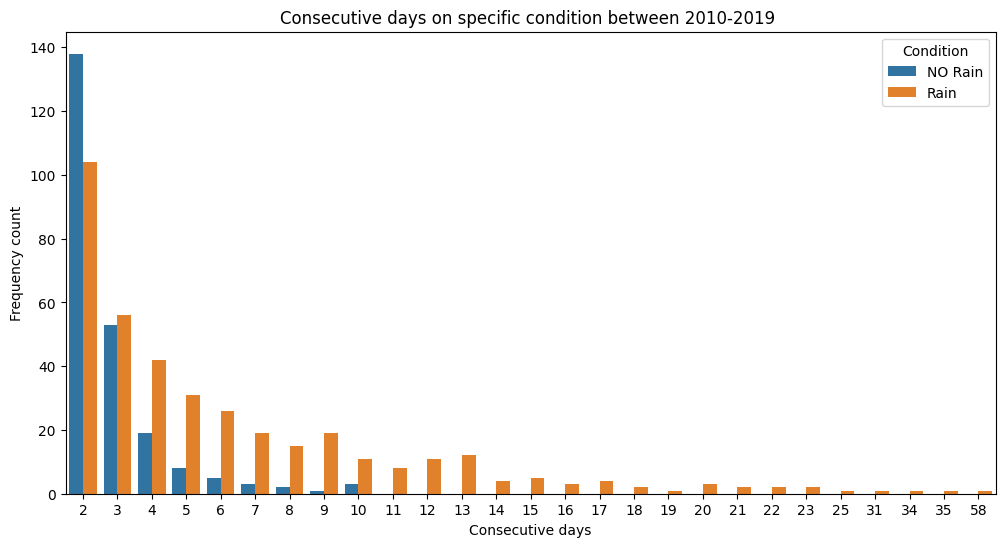

In [38]:
plt.figure(figsize=(12 , 6))

ax = sns.countplot(x = "Consecutive" , hue = "Condition" , data = consec_df.query("Consecutive >= 2"))
ax.set_title("Consecutive days on specific condition between 2010-2019 ")
ax.set(xlabel="Consecutive days" , ylabel="Frequency count")
_ = plt.legend(loc = "best", title = "Condition")
plt.show()

# data = consec_df.query("Consecutive >= 2")
# ax = sns.histplot(
#     data=data, x="Consecutive", hue="Condition", multiple="stack", discrete=True, shrink=0.8         
# )
# ax.set_title("Consecutive days on specific condition between 2010-2019")
# ax.set(xlabel="Consecutive days", ylabel="Frequency count")
# ax.legend(title="Condition", loc="best")
# plt.show()

### Consecutive count for rain and no rain date range  ###

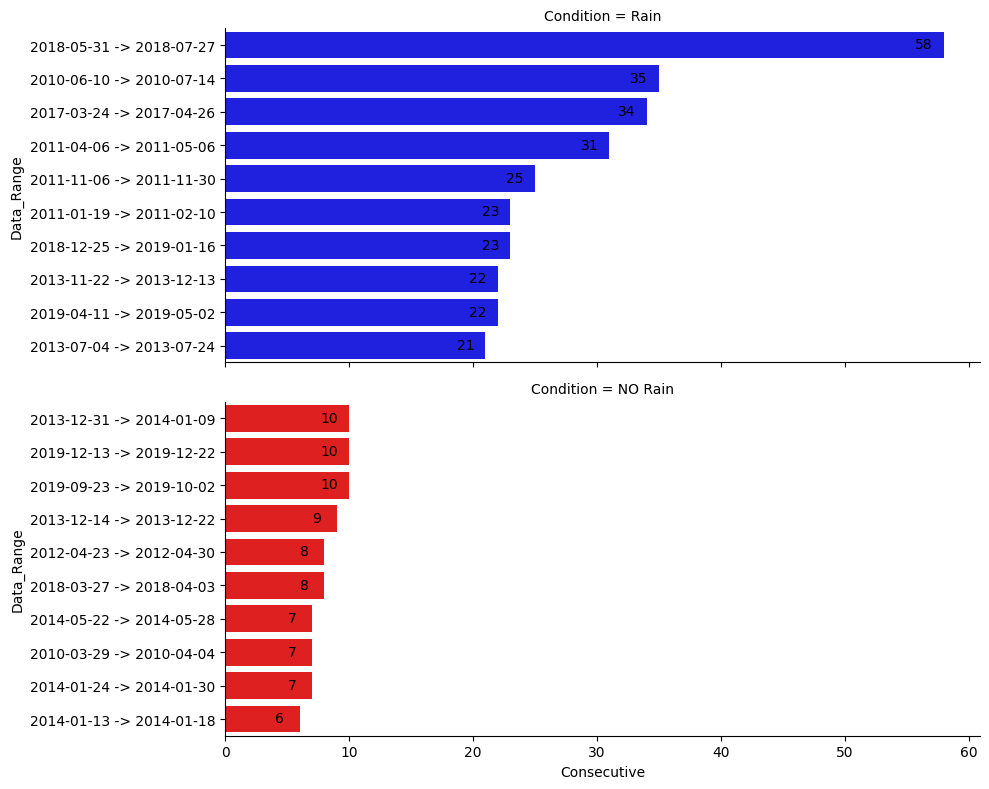

In [39]:
consec_df['Date_Range'] = consec_df["Begin_Date"].astype(str) + ' -> ' + consec_df["End_Date"].astype(str)
top10_per_condition = consec_df.sort_values(by='Consecutive',ascending = False).groupby('Condition').head(10)

d = {'color': ['b', 'r']}
g = sns.FacetGrid(top10_per_condition, row="Condition",hue='Condition',hue_kws=d,sharey=False)
g.figure.set_figheight(8)
g.figure.set_figwidth(10)
    
_ = g.map(sns.barplot, "Consecutive", "Date_Range") # Condition 0 = Dry , 1 = Rain 
_ = g.set(ylabel='Data_Range')

# Add the numbers inside the bars
for ax in g.axes.flat:
 for p in ax.patches:
  width = p.get_width()
  _ = ax.text(width -1.6, p.get_y() + p.get_height()/2. + 0.1,'{:1.0f}'.format(width), ha="center")

### Seasonal distribution ###

In [40]:

def season(m):
    if m in [12, 1, 2]: return "Winter"
    if m in [3, 4, 5]: return "Spring"
    if m in [6, 7, 8]: return "Summer"
    return "Automn"

df["Season"] = df["Month"].apply(season)

In [41]:
df.head(5)

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,Year,Month,Day,Weekdays,Week,Weekends,Raining,val_grp,Season
0,51.478,-0.461,25.3,2010-01-01,0.0,0.8,2010,1,1,4,4,False,1,1,Winter
1,51.478,-0.461,25.3,2010-01-02,0.0,1.8,2010,1,2,5,5,True,1,1,Winter
2,51.478,-0.461,25.3,2010-01-03,0.0,0.4,2010,1,3,6,6,True,1,1,Winter
3,51.478,-0.461,25.3,2010-01-04,0.0,-2.8,2010,1,4,0,0,False,1,1,Winter
4,51.478,-0.461,25.3,2010-01-05,0.3,-1.3,2010,1,5,1,1,False,1,1,Winter


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


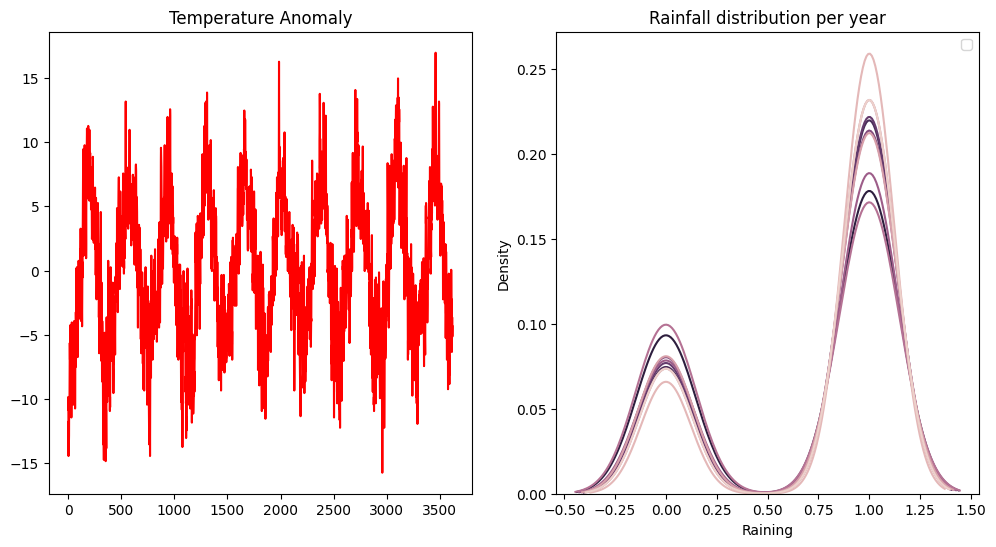

In [42]:
fig , ax = plt.subplots(nrows=1, ncols=2 , figsize = (12 , 6))
ax[0].plot(TAVG_Anomaly, color = "red")
ax[0].set_title("Temperature Anomaly")
# sns.displot(data = df , x = "Raining" , hue = "Year" , kind="kde" , rug_kws="0.2f")
sns.kdeplot(data=df ,  x = "Raining" , hue = "Year" , ax = ax[1])
ax[1].set_title("Rainfall distribution per year")
plt.legend()
plt.show()

### Precipitation average distribution ###

In [43]:
df.nlargest(10,'PRCP')[['DATE','PRCP','TAVG']]

,DATE,PRCP,TAVG
2043,2015-08-27,48.0,15.6
2010,2015-07-25,37.6,16.3
2728,2017-07-12,36.6,17.3
3188,2018-10-15,36.3,12.5
3417,2019-06-11,34.0,13.2
1352,2013-09-14,29.7,11.9
892,2012-06-11,29.0,11.9
2301,2016-05-11,27.7,16.1
1453,2013-12-24,26.9,8.4
1572,2014-04-22,26.9,11.9


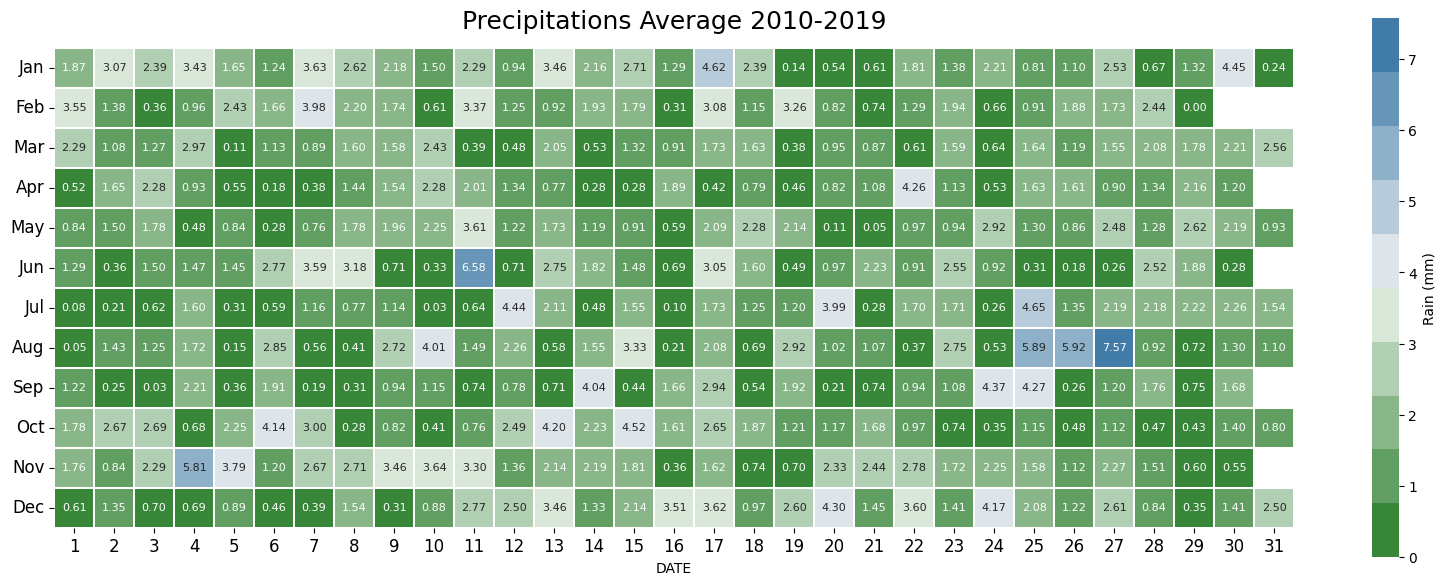

In [44]:
custom_palette = sns.diverging_palette(128, 240, n=10)
plt.figure(figsize = (20, 14))
ax = sns.heatmap(all_days_avg_df, cmap = custom_palette, annot=True, fmt='.2f',
                 vmin=0, linewidths=.1,
                 annot_kws={"size": 8}, square=True,
                 cbar_kws={"shrink": .5, 'label': 'Rain (mm)'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
ax.tick_params(rotation = 0)
_ = plt.title('Precipitations Average 2010-2019', fontdict={'fontsize':18}, pad=14)

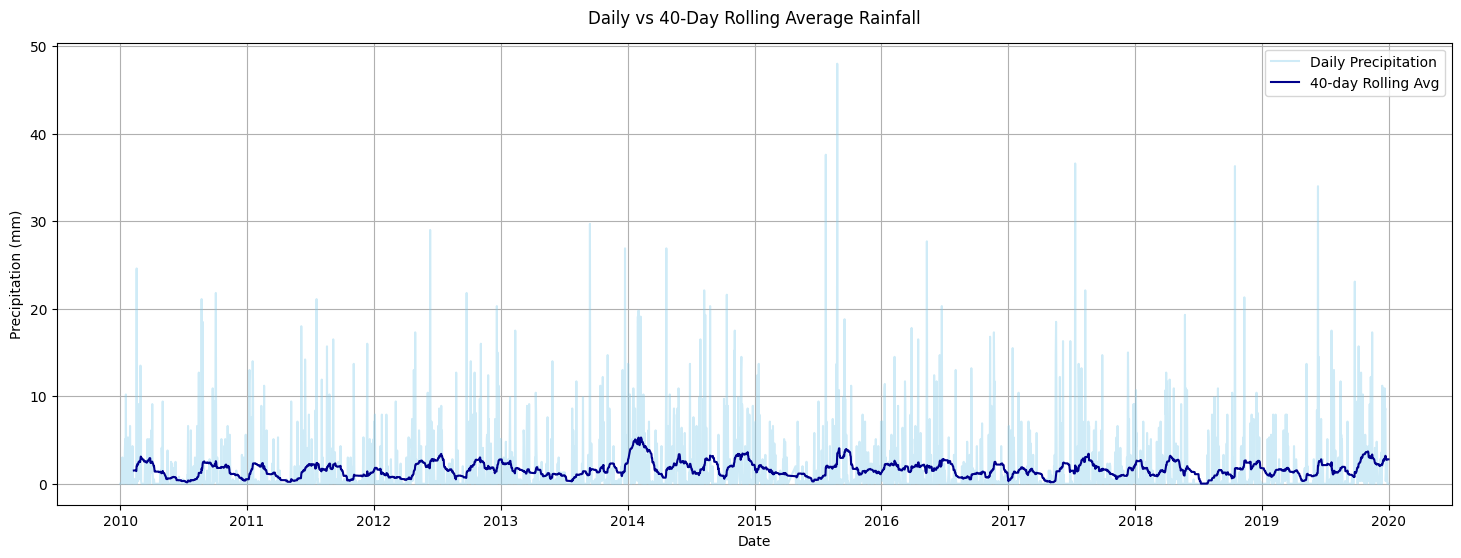

In [45]:
# Average to identify period with high precipitations.

plt.figure(figsize=(18,6))
plt.plot(df['DATE'], df['PRCP'], 
         alpha=0.4, label='Daily Precipitation', color='skyblue')
plt.plot(df['DATE'], 
         df['PRCP'].rolling(40).mean(), 
         label='40-day Rolling Avg', color='darkblue')
plt.title('Daily vs 40-Day Rolling Average Rainfall', pad=14)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()



In [46]:
df.dtypes

LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
PRCP                float64
TAVG                float64
Year                  int32
Month                 int32
Day                   int32
Weekdays              int32
Week                  int32
Weekends               bool
Raining               int32
val_grp               int32
Season               object
dtype: object

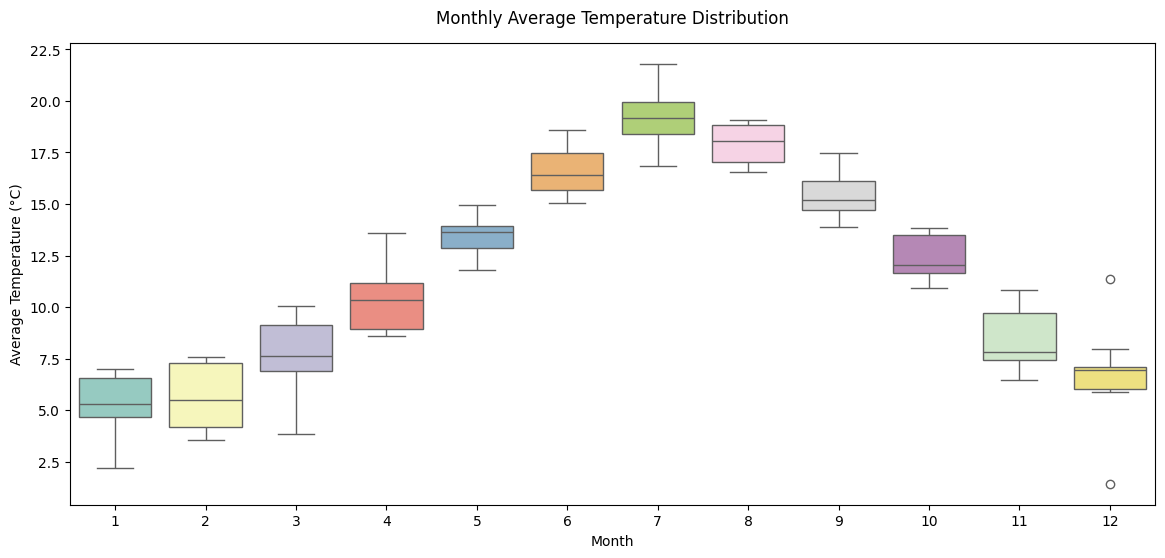

In [47]:
# Boxplot temperature trend per Month
df['TAVG'] = pd.to_numeric(df['TAVG'], errors='coerce')

ops_month_df = (
    df.groupby(['Month','Year'])['TAVG']
      .mean()
      .reset_index()
)

plt.figure(figsize=(14,6))
ax = sns.boxplot(x="Month", y="TAVG", data=ops_month_df , palette="Set3")
ax.set_title("Monthly Average Temperature Distribution", pad=14)
ax.set_xlabel("Month")
ax.set_ylabel("Average Temperature (°C)")
plt.show()

Rainfall across Monthly related to temperature difference and the average precipetation 

In [48]:
def relat_monthly_avg_temp(df):
    df['TAVG'] = pd.to_numeric(df['TAVG'] , errors='ignore')
    grouped = ( df.groupby(['Month','Year','Raining'])['TAVG'] .mean() .reset_index())
    return grouped

ops_month_df = relat_monthly_avg_temp(df)
print(ops_month_df.head(5))


   Month  Year  Raining      TAVG
0      1  2010        0  2.269231
1      1  2010        1  2.122222
2      1  2011        0  7.328571
3      1  2011        1  4.429167
4      1  2012        0  6.625000


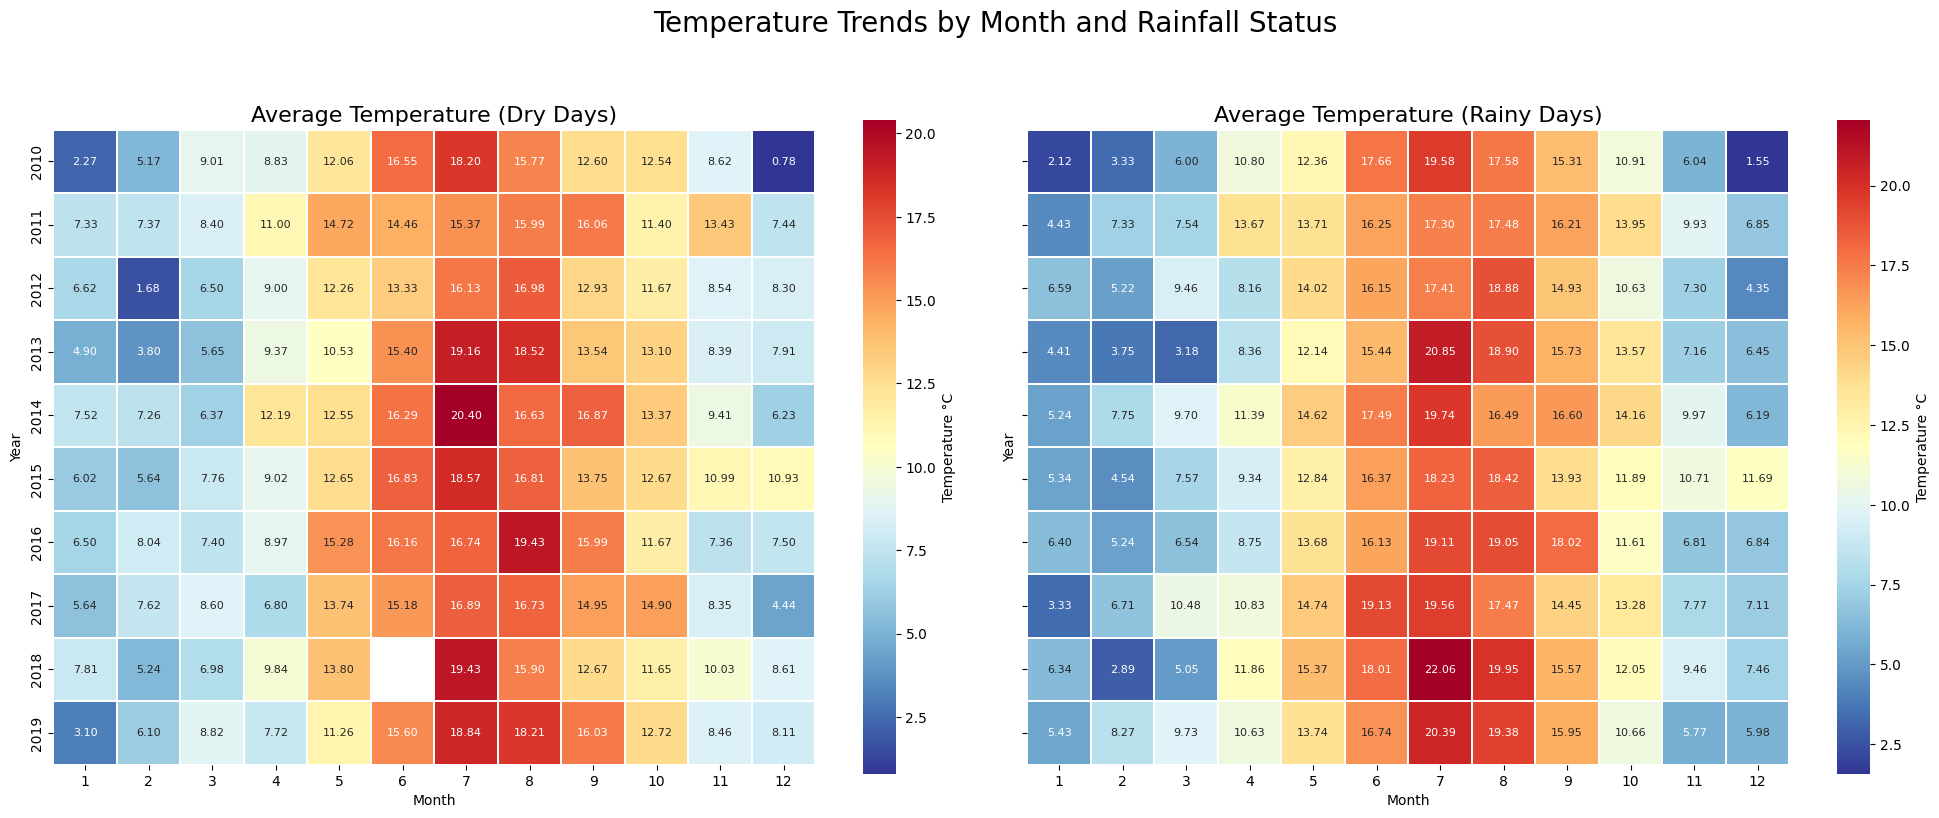

In [49]:
def relat_monthly_avg_temp(df):
    df['TAVG'] = pd.to_numeric(df['TAVG'] , errors='ignore')
    grouped = ( df.groupby(['Month','Year','Raining'])['TAVG'] .mean() .reset_index())
    
    rainy = grouped[grouped['Raining'] == 1]
    dry = grouped[grouped['Raining'] == 0]

    rainy_pivot = rainy.pivot(index='Year', columns='Month', values='TAVG')
    dry_pivot = dry.pivot(index='Year', columns='Month', values='TAVG')

    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    sns.heatmap(dry_pivot, ax=axes[0], cmap='RdYlBu_r', annot=True, fmt='.2f',
                linewidths=.2, annot_kws={"size": 8}, square=True,
                cbar_kws={"shrink": .9, 'label': 'Temperature °C'})
    axes[0].set_title("Average Temperature (Dry Days)", fontsize=16)
    axes[0].set_xlabel("Month")
    axes[0].set_ylabel("Year")

    sns.heatmap(rainy_pivot, ax=axes[1], cmap='RdYlBu_r', annot=True, fmt='.2f',
                linewidths=.2, annot_kws={"size": 8}, square=True,
                cbar_kws={"shrink": .9, 'label': 'Temperature °C'})
    axes[1].set_title("Average Temperature (Rainy Days)", fontsize=16)
    axes[1].set_xlabel("Month")

    plt.suptitle("Temperature Trends by Month and Rainfall Status", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()


ops_month_df = relat_monthly_avg_temp(df)

In [50]:
# Save DataFrame to CSV
df.to_csv("Processed_df.csv", index=False)
print("the processed data is created ")


the processed data is created 
